<a href="https://colab.research.google.com/github/seandaza/Python-The-Fundamentals/blob/master/Geopandas_Mapas_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geopandas - Mapas

In [ ]:
!pip install geopandas
!pip install mapclassify
!pip install rtree
!pip install pygeos

SyntaxError: invalid syntax (Temp/ipykernel_4036/2128799569.py, line 1)

GeoPandas es una librería que brinda soporte a datos geográficos usando Pandas. Implementa dos tipos de datos derivados de pandas.Series y pandas.DataFrame (**GeoSeries** y **GeoDataFrame**). Las operaciones geométricas soportadas por Geopandas son cartesianas. 

In [ ]:
%matplotlib inline
import ogr  # GDAL/OGR
import shapely
from shapely.geometry import *
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

ModuleNotFoundError: No module named 'ogr'

## GeoSerie

In [ ]:
p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = gpd.GeoSeries([p1, p2, p3])

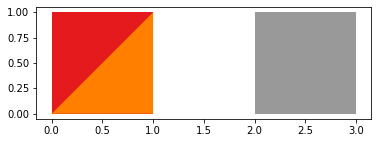

In [ ]:
g.plot(cmap='Set1')

Acabamos de definir un elemento de tipo `GeoSeries`. Una `GeoSeries` es un vector donde cada entrada corresponde a un conjunto de figuras que corresponden a una observación. Una entrada puede consistir de solo una figura (Un simple polígono o punto) o de múltiples figuras que se entienden como una observación (Por ejemplo, el conjunto de polígonos que forman las islas de San Andrés y Providencia). 

`Geopandas` soporta los siguientes tipos de objetos geométricos:

- Points / Multi-Points [Documentación](http://toblerity.org/shapely/manual.html#points)
- Lines / Multi-Lines [Documentación](http://toblerity.org/shapely/manual.html#linestrings)
- Polygons / Multi-Polygons [Documentación](http://toblerity.org/shapely/manual.html#polygons)

Cada uno de estos objetos son a su vez objetos de la librería `shapely`. 

### Atributos

`shapely` nos permite ejecutar operaciones como:

In [ ]:
g.area

0    1.0
1    0.5
2    1.0
dtype: float64

In [ ]:
g.bounds

,minx,miny,maxx,maxy
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0
2,2.0,0.0,3.0,1.0


In [ ]:
g.geom_type

0    Polygon
1    Polygon
2    Polygon
dtype: object

### Métodos básicos

In [ ]:
# Distancia entre elementos

print(p1.distance(p3))

1.0


In [ ]:
print(g.distance(p3))

0    1.0
1    1.0
2    0.0
dtype: float64


In [ ]:
g.centroid

0    POINT (0.50000 0.50000)
1    POINT (0.66667 0.33333)
2    POINT (2.50000 0.50000)
dtype: geometry

In [ ]:
g.representative_point() 
# A diferencia de centroid, regresa un punto representativo que está garantizado, 
# se encuentra dentro de la geometría

0    POINT (0.50000 0.50000)
1    POINT (0.75000 0.50000)
2    POINT (2.50000 0.50000)
dtype: geometry

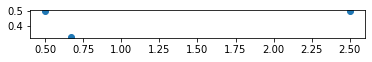

In [ ]:
g.centroid.plot()

### Pruebas de relación

In [ ]:
# Compara si la figura de un objeto geométrico es casi igual
g.geom_almost_equals(p3)

0    False
1    False
2     True
dtype: bool

In [ ]:
# Regresa verdadero si una figura está contenida en otra
p1.contains(p2)

True

In [ ]:
p2.contains(p1)

False

In [ ]:
# Regresa verdadero si una figura está intersectada con otra
p1.intersects(p2)

True

## GeoDataFrame

Un `GeoDataFrame` es una estructura de datos tabular que contiene una columna de tipo `GeoSeries`. 

Los `GeoDataFrames` siempre contienen una columna que se denomina geometría (`geometry`). Cuando una operación espacial es aplicada al `GeoDataFrame`, este comando siempre actuará sobre la columna `geometry`. La columna `geometry` podría tener un nombre diferente, el cual puede ser consultado usando `gdf.geometry.name`.

A continuación se presenta un ejemplo usando `GeoDataFrame`:

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

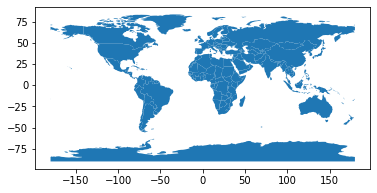

In [ ]:
world.plot()

In [ ]:
world.geometry.name

'geometry'

In [ ]:
world['centroid_column'] = world.centroid # Nueva columna con el centroide de cada país
world = world.set_geometry('centroid_column') # Aquí cambiamos la columna geometry a la columna centroid_column
print(world.geometry.name) 

centroid_column


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


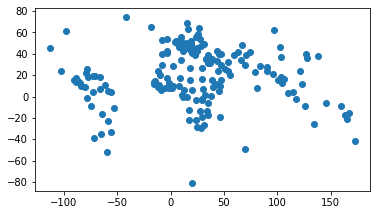

In [ ]:
world.plot()

# Cargando datos

`gpd.read_file` permite la carga de conjuntos de datos a través de la libería `fiona`. `fiona` soporta una gran cantidad de formatos, entre ellos GeoJSON. `gpd.read_file` regresa automáticamente un `GeoDataFrame`.

In [ ]:
df_bogota = gpd.read_file('bogota_cadastral.json')

In [ ]:
df_bogota.head()

,cartodb_id,scacodigo,scatipo,scanombre,shape_leng,shape_area,MOVEMENT_ID,DISPLAY_NAME,geometry
0,12,004575,0,LOS LAURELES,0.027741,0.000037,1,"LOS LAURELES, 004575 (1)","MULTIPOLYGON (((-74.20029 4.61725, -74.20028 4..."
1,26,006524,0,LA MAGDALENA,0.053219,0.000089,2,"LA MAGDALENA, 006524 (2)","MULTIPOLYGON (((-74.16276 4.66008, -74.16272 4..."
2,45,102502,1,EL UVAL RURAL,0.171333,0.000708,3,"EL UVAL RURAL, 102502 (3)","MULTIPOLYGON (((-74.11931 4.49017, -74.11933 4..."
3,74,005501,0,PALO BLANCO,0.017187,0.000018,4,"PALO BLANCO, 005501 (4)","MULTIPOLYGON (((-74.09353 4.68101, -74.09481 4..."
4,77,009240,0,POTRERILLO,0.010527,0.000007,5,"POTRERILLO, 009240 (5)","MULTIPOLYGON (((-74.09744 4.73531, -74.09620 4..."


`GeoPandas` permite la indexación y selección de datos de la misma forma que pandas, a través de `.loc` e `.iloc`. Por ejemplo si queremos filtrar aquellas áreas mayores a 0.0006, lo podemos hacer de la siguiente manera:

In [ ]:
df_bogota_large = df_bogota.loc[df_bogota.shape_area > 0.0006]

print(df_bogota_large.count())
print(df_bogota.count())

cartodb_id      42
scacodigo       42
scatipo         42
scanombre       42
shape_leng      42
shape_area      42
MOVEMENT_ID     42
DISPLAY_NAME    42
geometry        42
dtype: int64
cartodb_id      1160
scacodigo       1160
scatipo         1160
scanombre       1160
shape_leng      1160
shape_area      1160
MOVEMENT_ID     1160
DISPLAY_NAME    1160
geometry        1160
dtype: int64


In [ ]:
df_bogota_large.describe()

,cartodb_id,scatipo,shape_leng,shape_area
count,42.000000,42.0,42.000000,42.000000
mean,500.523810,1.0,0.255768,0.002115
std,316.859378,0.0,0.105799,0.001899
min,45.000000,1.0,0.133061,0.000637
25%,268.250000,1.0,0.172024,0.000941
50%,421.000000,1.0,0.226520,0.001458
75%,808.500000,1.0,0.311325,0.002421
max,1146.000000,1.0,0.612587,0.008634


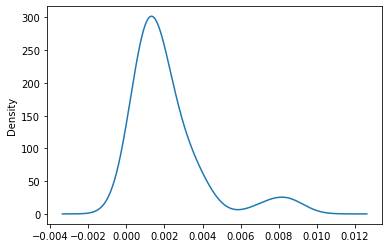

In [ ]:
df_bogota_large.shape_area.plot(kind='kde')

In [ ]:
df_bogota.loc[df_bogota.shape_area > 0.006]

,cartodb_id,scacodigo,scatipo,scanombre,shape_leng,shape_area,MOVEMENT_ID,DISPLAY_NAME,geometry
20,531,103108,1,LOS RIOS,0.545648,0.007196,21,"LOS RIOS, 103108 (21)","MULTIPOLYGON (((-74.11416 4.18183, -74.11413 4..."
266,575,109111,1,SAN JOSE,0.612587,0.008634,267,"SAN JOSE, 109111 (267)","MULTIPOLYGON (((-74.31811 3.87854, -74.31699 3..."
721,508,103109,1,LAS SOPAS,0.437596,0.008302,722,"LAS SOPAS, 103109 (722)","MULTIPOLYGON (((-74.20573 4.14669, -74.20569 4..."


Adicionalmente nos permite hacer una selección de índices basado en coordenadas (`.cx`)

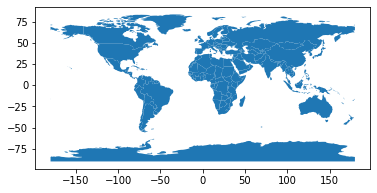

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.plot()

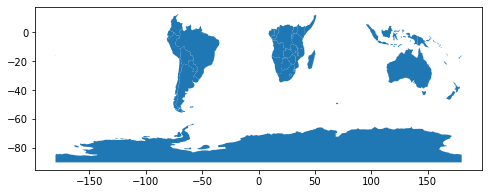

In [ ]:
hemisferio_sur = world.cx[:, :0]

hemisferio_sur.plot(figsize=(10, 3));

# Generando mapas

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

`GeoPandas` pinta los mapas usando matplotlib como soporte. Por lo tanto cualquier atributo que se modifique en pyplot, tambien se puede modificar en `.plot`. Por ejemplo:

(-197.99999999999997, 198.00000000000006, -98.6822565, 92.32738650000002)

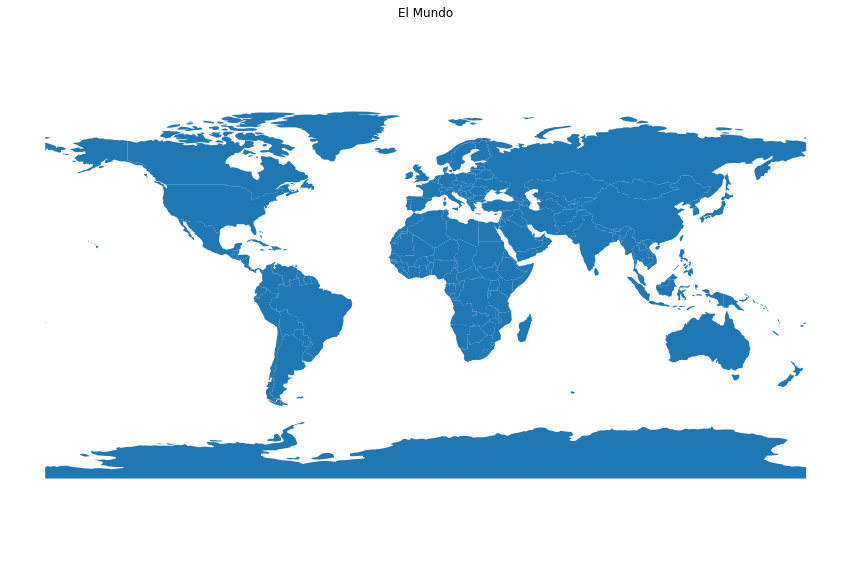

In [ ]:
f, ax = plt.subplots(1, figsize=(15, 10))
ax.set_title(u'El Mundo')

# Carga la configuración que hayamos generado en el elemento ax
world.plot(ax=ax)

# Eliminamos los ejes
ax.set_axis_off()
plt.axis('equal')

### Mapas coropléticos

Para elaborar un mapa cloroplético, basta con indicar la columna sobre la cual se van a clasificar los datos:

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


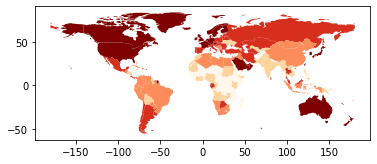

In [ ]:
world = world[(world['pop_est']>0) & (world['name']!="Antarctica")] # Eliminamos Antarctica

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est # Creamos una nueva columna: PIB per cápita

world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles') # Creamos un mapa coroplético sobre gdp_per_cap

# Agregación usando `dissolve`

Es común que los datos espaciales que estemos manejando tengan un nivel de granularidad mayor del que necesitamos. Por ejemplo podemos tener información de los estratos a nivel de manzana en una ciudad, pero estamos interesados en estudiar patrones a nivel de UPZ, barrios o localidades. En caso de trabajar con datos no espaciales, la función `groupby` se ajusta a las necesidades mencionadas. Sin embargo, `GeoPandas` provee una función que agrega características geométricas a través de la función `dissolve`.

`dissolve` trabaja así: 
1. Si dos polígonos conjuntos comparten un grupo (Por ejemplo estrato), ambos son fusionados en un solo polígono o característica geométrica.
2. Los datos relacionados a cada polígono son agregados usando la función `groupby.aggregate()`
3. Combina tanto (1) como (2)

En el siguiente ejemplo combinaremos países para formar continentes. Y luego visualizaremos la información de población total, usando un mapa cloroplético:

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry', 'pop_est']]
world.head(10)

,continent,geometry,pop_est
0,Oceania,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",920938
1,Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",53950935
2,Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",603253
3,North America,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",35623680
4,North America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",326625791
5,Asia,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",18556698
6,Asia,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",29748859
7,Oceania,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",6909701
8,Asia,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",260580739
9,South America,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",44293293


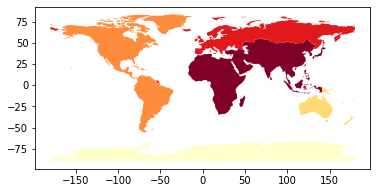

In [ ]:
continents = world.dissolve(by='continent', aggfunc='sum') #Escogemos la columna de agregación y la operación de agregación

continents.plot(column = 'pop_est', scheme='quantiles', cmap='YlOrRd');

In [ ]:
continents

,geometry,pop_est
continent,,
Africa,"MULTIPOLYGON (((32.830 -26.742, 32.580 -27.470...",1219176238
Antarctica,"MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...",4050
Asia,"MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...",4389144868
Europe,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...",746398461
North America,"MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...",573042112
Oceania,"MULTIPOLYGON (((169.668 -43.555, 170.525 -43.0...",36782844
Seven seas (open ocean),"POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5...",140
South America,"MULTIPOLYGON (((-66.960 -54.897, -67.291 -55.3...",418540749


# Fusionando datos

[Documentación](http://geopandas.org/mergingdata.html)

Existen dos maneras de combinar conjuntos de datos en geopandas. *Uniones de atributos* o *uniones espaciales*. 

En una unión de atributos, un `GeoSeries` o `GeoDataFrame` es combinado con un Series o DataFrame de pandas usando una variable en común. Esta operación es análoga a `pd.merge`, sin embargo si se hace usando pandas, el resultado será un DataFrame de pandas y no un `GeoDataFrame`.

En una unión espacial, todas las observaciones de un `GeoSeries` o `GeoDataFrame` son combinadas con base a una relación espacial establecida entre ellas. A continuación presentamos un ejemplo de una unión espacial. Tenemos la información de las ciudades y en otro `GeoDataFrame` tenemos la información de los países. Usamos una unión espacial para fusionar ambas fuentes de datos:

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries = world[['geometry', 'name']]

countries = countries.rename(columns={'name':'country'})

In [ ]:
countries.head()

,geometry,country
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America


In [ ]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
